In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading Datasets and Importing Libraries 

In [ ]:
# Importing Tensorflow and the required visualization libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#Loading the Dataset
train = pd.read_csv('/content/drive/My Drive/dataanalytics/train.csv')
test = pd.read_csv('/content/drive/My Drive/dataanalytics/test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

# Preprocessing Data

In [ ]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

# Building, Compiling and Training model

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),    
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Training the model
history = model.fit(X_train, Y_train, batch_size=64,epochs=15,validation_data=(X_val, Y_val),steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


525/525 [==============================] - 73s 139ms/step - loss: 0.3372 - accuracy: 0.8875 - val_loss: 0.0637 - val_accuracy: 0.9811
Epoch 2/15
525/525 [==============================] - 70s 134ms/step - loss: 0.0965 - accuracy: 0.9700 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 3/15
525/525 [==============================] - 71s 135ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0471 - val_accuracy: 0.9854
Epoch 4/15
525/525 [==============================] - 70s 132ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 5/15
525/525 [==============================] - 70s 133ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0466 - val_accuracy: 0.9874
Epoch 6/15
525/525 [==============================] - 69s 131ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.0580 - val_accuracy: 0.9843
Epoch 7/15
525/525 [==============================] - 70s 134ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0509 - val_accuracy: 0.9

# Evaluating Results

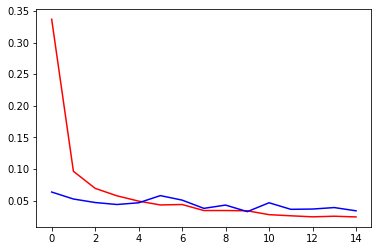

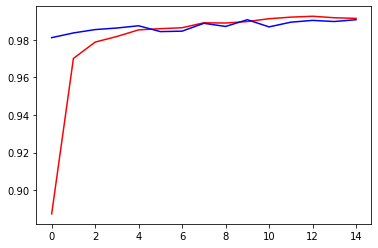

In [ ]:
#Comparing losses and accuraries 
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [ ]:
#Plotting Confusion Matrix
y_pred1 = model.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[[818   0   0   0   0   0   3   0   1   1]
 [  1 916   3   0   0   0   0   3   1   0]
 [  0   2 811   1   1   0   0   0   1   0]
 [  0   0   5 868   0   4   0   3   1   2]
 [  0   4   0   0 801   0   0   0   0   1]
 [  1   0   0   1   0 755   4   0   0   0]
 [  1   0   1   0   0   3 810   0   0   0]
 [  0   1   5   0   0   0   0 876   0   2]
 [  2   1   3   0   1   1   1   0 817   0]
 [  3   0   0   1   1   1   0   4   3 849]]


# Saving the Predictions

In [ ]:
#Predicting and Saving it as a CSV file
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('/content/drive/My Drive/dataanalytics/resulte.csv', index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


 **How does data augmentation affect the performance? Report the test
accuracy without data augmentation in the original code.**

With a quick glance of the the Train accuracy, Validation Accuracy and Test Accuracy of neurons (32,64) without data augmentation  are " 97.5, 98.2, 99.032 ". The Train accuracy, Validation Accuracy and Test Accuracy of neurons (32,64) with data augmentation are " 95, 98, 99.096 ".
There is some significant decrement in all the fields of Validation Accuracy and Test Accuracy.

**Data Augmentation avoids the overfitting problem **
